## Import

In [1]:
import os, sys, inspect, time

import numpy as np
import torch 
import matplotlib.pyplot as plt
torch.multiprocessing.set_sharing_strategy('file_system')

import discrepancy, visualization
from algorithms import ABC_algorithms, SMCABC, SMC2ABC, SNLABC, SNL2ABC
from problems import problem_OP

import utils_os, utils_math

%load_ext autoreload
%autoreload 2

## Problem Definition

mean-parma1 =  0.3720654037899112      mean-param2 =  0.21902819231692378


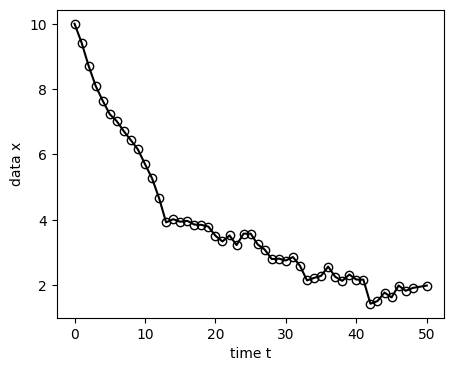

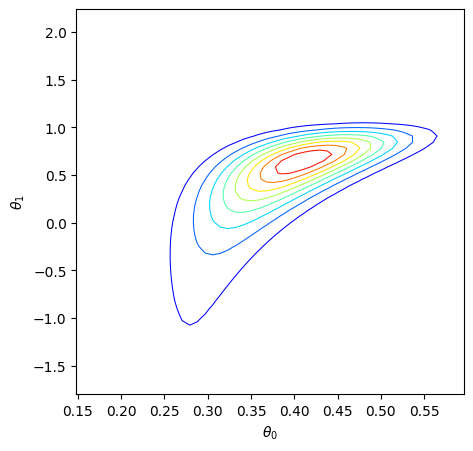

In [2]:
DIR = 'results/OP'                                             
RERUN = not utils_os.is_file_exist(DIR, 'true_samples.npy') 

## Define the problem
problem = problem_OP.OP_Problem(N=2000, n=50)
true_theta = problem.get_true_theta()

## Get x_o ~ p(x|theta)
if RERUN:
    # observed data x_o
    problem.data_obs = problem.simulator(true_theta)
    problem.y_obs = problem.statistics(data=problem.data_obs, theta=true_theta)
    utils_os.save_object(DIR, 'data_obs', problem.data_obs)
    utils_os.save_object(DIR, 'y_obs', problem.y_obs)
    
    # true samples theta ~ pi(theta|x_o)
    true_samples = problem.sample_from_true_posterior()
    utils_os.save_object(DIR, 'true_samples', true_samples)
else:
    # load previously simulated true samples & x_o
    true_samples = utils_os.load_object(DIR, 'true_samples.npy')
    problem.data_obs  = utils_os.load_object(DIR, 'data_obs.npy')
    problem.y_obs  = utils_os.load_object(DIR, 'y_obs.npy')
    
## Visualize
problem.visualize()   
visualization.plot_likelihood(samples=true_samples, log_likelihood_function=problem.log_likelihood, dimensions=(0,1))
plt.savefig('OP_true_posterior.png')

## Inference

### SMC-ABC

iteration  0
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  1
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  2
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  3
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  4
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  5
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  6
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  7
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  8
# of cpus =  4
> learning fake posterior 
> learning true posterior 


iteration  9
# of cpus =  4
> learning fake posterior 
fitting Gaussian copula progress= 0.0 loss= 79.0533676147461
fitting Gaussian copula progress= 0.1 loss= -170.26991271972656
fitting Gaussian copula progress= 0.2 loss= -197.28741455078125


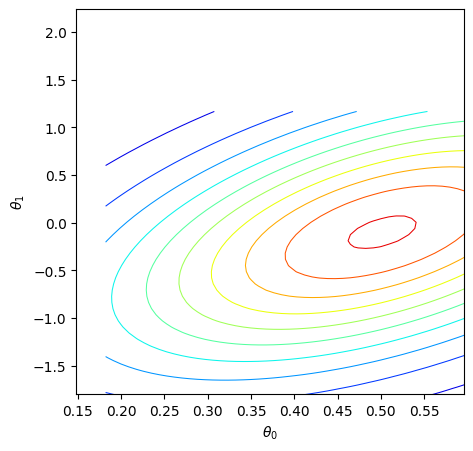

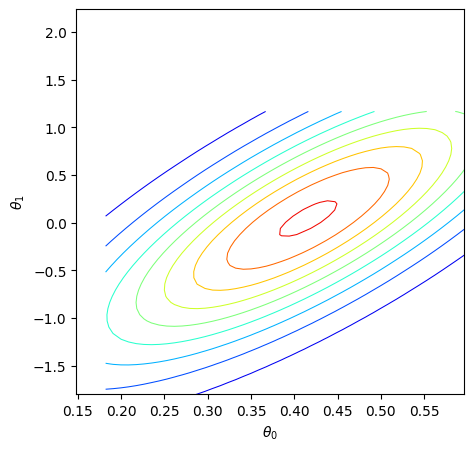

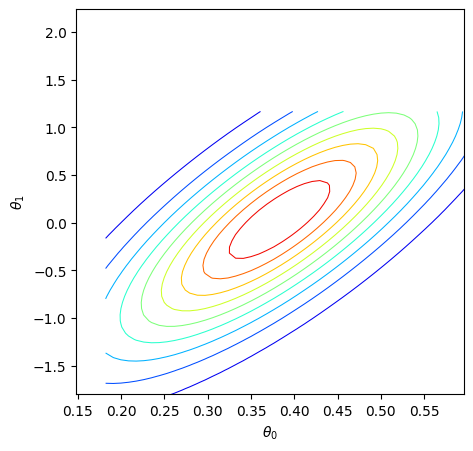

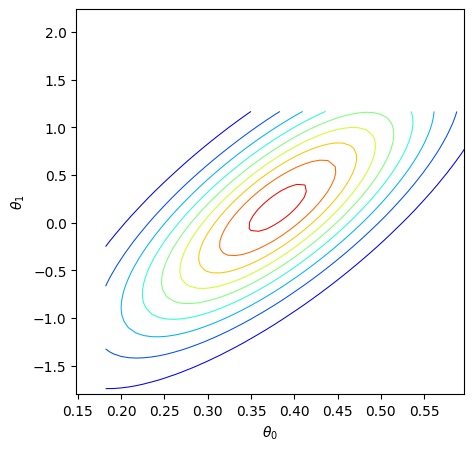

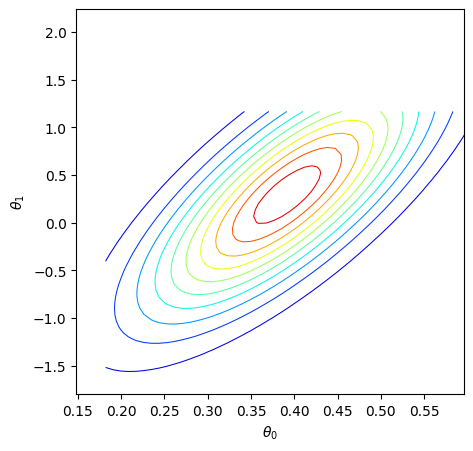

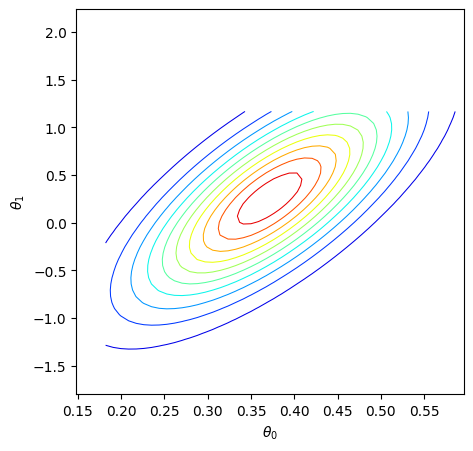

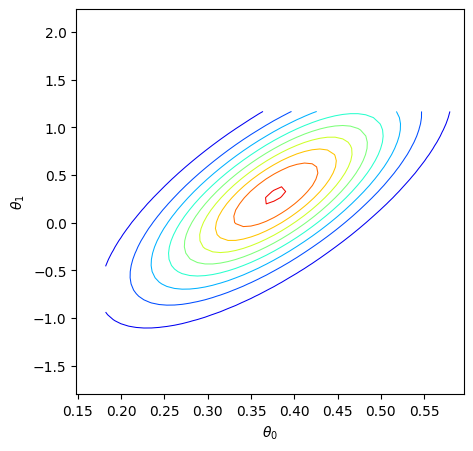

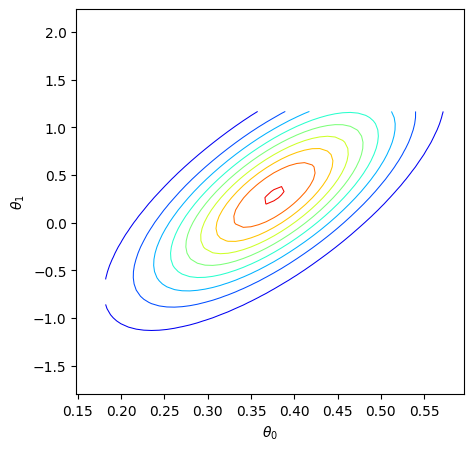

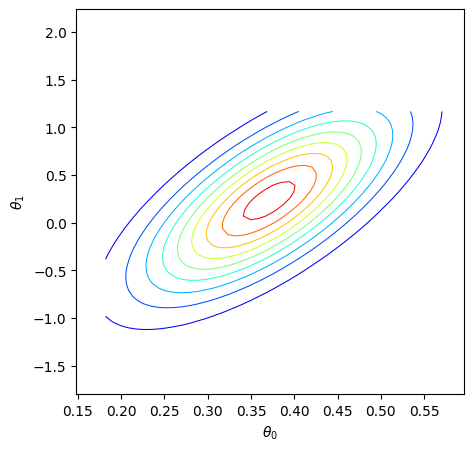

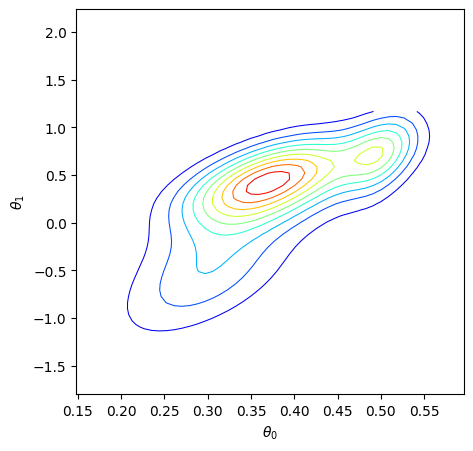

In [3]:
## Sequential Monte Carlo ABC

hyperparams = ABC_algorithms.Hyperparams()
hyperparams.save_dir = DIR
hyperparams.device = 'cuda'
hyperparams.num_sim = 4000                        # number of simulations
hyperparams.num_samples = 200                     # number of samples to represent posterior
hyperparams.L = 10                                 # number of rounds in sequential learning

smc_abc = SMCABC.SMC_ABC(problem, discrepancy=discrepancy.eculidean_dist, hyperparams=hyperparams)
smc_abc.run()

JSD_smc_array = []
for l in range(hyperparams.L):
    print('round =', l)
    smc_abc.posterior = smc_abc.posterior_array[l]
    visualization.plot_likelihood(samples=true_samples, log_likelihood_function=smc_abc.log_likelihood, dimensions=(0,1))
    JSD = discrepancy.JSD(problem.log_likelihood, smc_abc.log_likelihood, true_samples, true_samples, N_grid=30)
    JSD_smc_array.append(JSD)
    print('JSD smc = ', JSD)
utils_os.save_object(DIR, 'JSD_SMC', JSD_smc_array)

iteration  0
# of cpus =  4

 > fitting encoder
summary statistic dim = 4 original dim = 50
architecture [50, 100, 100, 4]
finished: t= 0 loss= 1.436402678489685 loss val= 1.4357131719589233 best loss 1.4357131719589233
finished: t= 200 loss= 0.8562097549438477 loss val= 0.8627200126647949 best loss 0.8551892042160034
finished: t= 400 loss= 0.5714674592018127 loss val= 0.5755694508552551 best loss 0.5453709959983826
finished: t= 600 loss= 0.44683098793029785 loss val= 0.46712732315063477 best loss 0.4445120692253113
finished: t= 800 loss= 0.420565128326416 loss val= 0.4090808033943176 best loss 0.38164401054382324
finished: t= 1000 loss= 0.368952214717865 loss val= 0.359835684299469 best loss 0.350974440574646
finished: t= 1200 loss= 0.3634093701839447 loss val= 0.37427252531051636 best loss 0.33100754022598267
finished: t= 1400 loss= 0.3211289346218109 loss val= 0.34501567482948303 best loss 0.3108821511268616
finished: t= 1600 loss= 0.33537888526916504 loss val= 0.3229477107524872 be



iteration  3
# of cpus =  4

 > fitting encoder
summary statistic dim = 4 original dim = 50
architecture [50, 100, 100, 4]
finished: t= 0 loss= 1.420823335647583 loss val= 1.4242475032806396 best loss 1.4242475032806396
finished: t= 200 loss= 0.49815529584884644 loss val= 0.6739903092384338 best loss 0.6685502529144287
finished: t= 400 loss= 0.42745912075042725 loss val= 0.6679121255874634 best loss 0.6353375911712646
finished: t= 600 loss= 0.4386509656906128 loss val= 0.6583319306373596 best loss 0.6353375911712646
finished: t= 800 loss= 0.4207298755645752 loss val= 0.6756336688995361 best loss 0.6353375911712646
finished: t= 1000 loss= 0.40089672803878784 loss val= 0.6781989336013794 best loss 0.6353375911712646
> learning fake posterior 
> learning true posterior 


iteration  4
# of cpus =  4

 > fitting encoder
summary statistic dim = 4 original dim = 50
architecture [50, 100, 100, 4]
finished: t= 0 loss= 1.3931714296340942 loss val= 1.3928327560424805 best loss 1.39283275604248

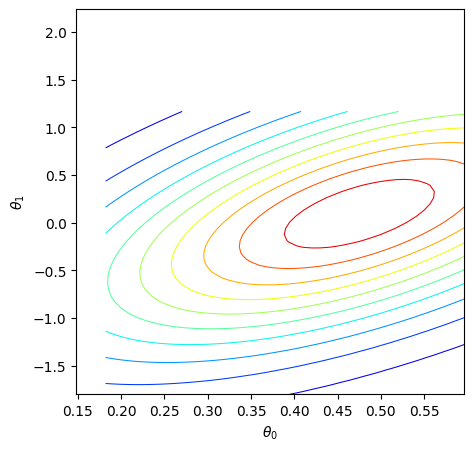

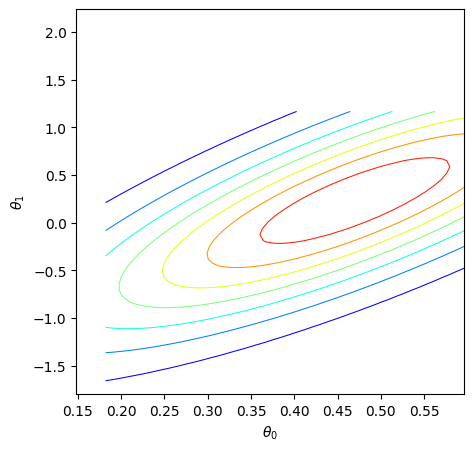

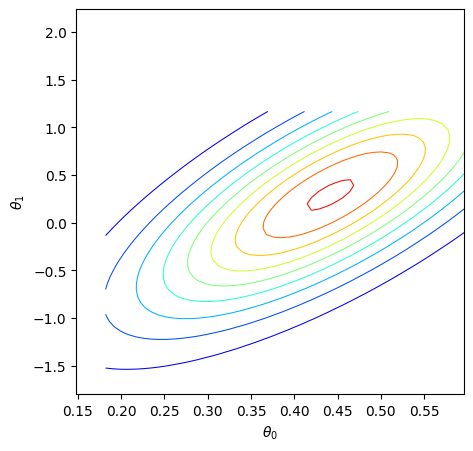

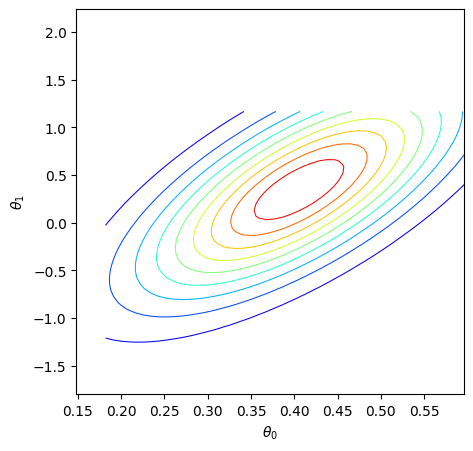

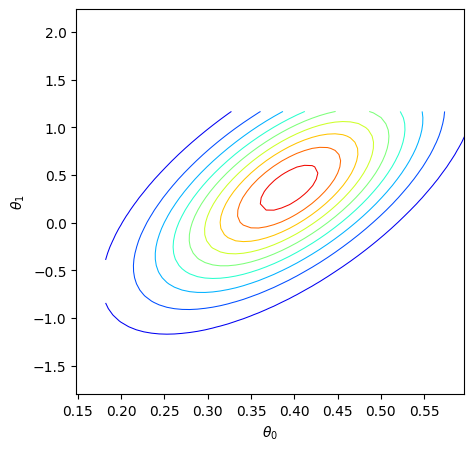

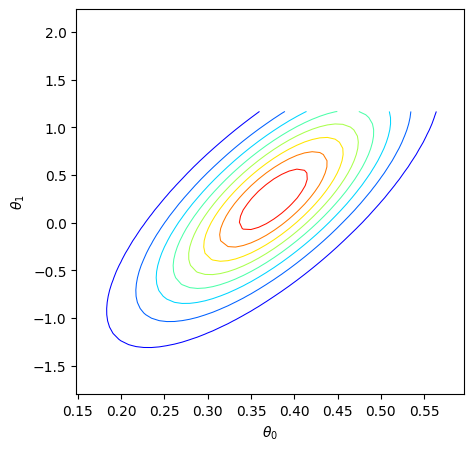

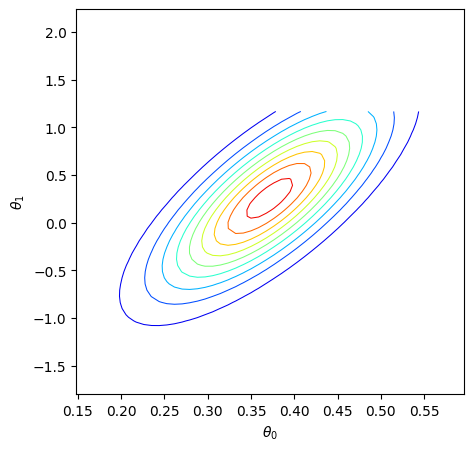

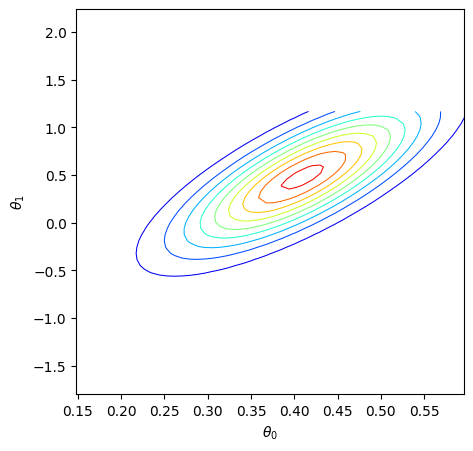

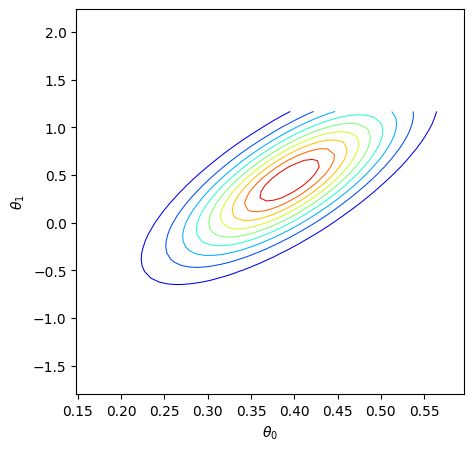

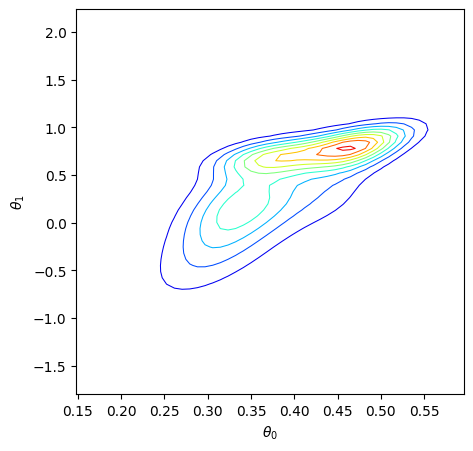

In [4]:
## Sequential Monte Carlo ABC +

hyperparams = ABC_algorithms.Hyperparams()
hyperparams.save_dir = DIR
hyperparams.device = 'cuda'
hyperparams.num_sim = 4000                       # number of simulations
hyperparams.num_samples = 200                    # number of samples to represent posterior
hyperparams.L = 10                               # number of learning rounds
hyperparams.type = 'cnn1d'                       # the network architecture of S(x)
hyperparams.stat = 'infomax'                     # statistics function: infomax/moment/score   
hyperparams.estimator = 'JSD'                    # MI estimator; JSD (accurate) or DC (fast)

smc2_abc = SMC2ABC.SMC2_ABC(problem, discrepancy=discrepancy.eculidean_dist, hyperparams=hyperparams)
smc2_abc.run()

JSD_smc2_array = []
for l in range(len(smc2_abc.posterior_array)):
    print('l=', l)
    smc2_abc.l = l
    smc2_abc.posterior = smc2_abc.posterior_array[l]
    visualization.plot_likelihood(samples=true_samples, log_likelihood_function=smc2_abc.log_likelihood, dimensions=(0,1))
    JSD = discrepancy.JSD(problem.log_likelihood, smc2_abc.log_likelihood, true_samples, true_samples, N_grid=30)
    JSD_smc2_array.append(JSD)
    print('JSD smc2 = ', JSD)
utils_os.save_object(DIR, 'JSD_SMC2', JSD_smc2_array)

### SNL


 SNL ABC
iteration  0
# of cpus =  4
finished: t= 0 loss= 818.8677368164062 loss val= 907.9887084960938 best loss 907.9887084960938
finished: t= 200 loss= 93.14533996582031 loss val= 96.70858001708984 best loss 96.70858001708984
finished: t= 400 loss= 59.905792236328125 loss val= 64.44960021972656 best loss 64.44960021972656
finished: t= 600 loss= 32.42443084716797 loss val= 36.94169235229492 best loss 36.94169235229492
finished: t= 800 loss= 19.62293815612793 loss val= 24.86087417602539 best loss 24.85494041442871
finished: t= 1000 loss= 14.649133682250977 loss val= 21.86205291748047 best loss 19.909494400024414
finished: t= 1200 loss= 10.299342155456543 loss val= 17.288311004638672 best loss 16.730911254882812
finished: t= 1400 loss= 7.865102291107178 loss val= 15.98703670501709 best loss 15.24034595489502
finished: t= 1600 loss= 4.482658863067627 loss val= 14.208465576171875 best loss 13.78855037689209
finished: t= 1800 loss= 2.6785542964935303 loss val= 13.388930320739746 best los

finished: t= 200 loss= 30.2734432220459 loss val= 26.398757934570312 best loss 26.398757934570312
finished: t= 400 loss= 10.98536205291748 loss val= 10.220252990722656 best loss 10.095712661743164
finished: t= 600 loss= 5.751506328582764 loss val= 6.464818477630615 best loss 6.464818477630615
finished: t= 800 loss= 2.2029459476470947 loss val= 5.155986309051514 best loss 4.719338417053223
finished: t= 1000 loss= -0.9228867292404175 loss val= 4.71860933303833 best loss 3.8669941425323486
finished: t= 1200 loss= -2.54744815826416 loss val= 3.755380392074585 best loss 3.0338966846466064
finished: t= 1400 loss= -3.217905282974243 loss val= 4.2455267906188965 best loss 3.0338966846466064
finished: t= 1600 loss= -4.234187602996826 loss val= 5.168811798095703 best loss 3.0338966846466064
finished: t= 1800 loss= -4.827136039733887 loss val= 6.712515354156494 best loss 3.0338966846466064


iteration  2
# of cpus =  4
finished: t= 0 loss= 742.3605346679688 loss val= 576.93212890625 best loss 576

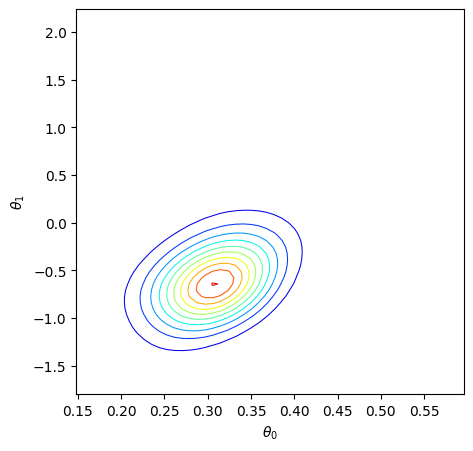

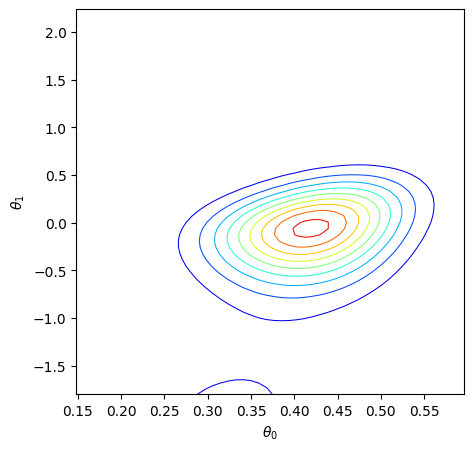

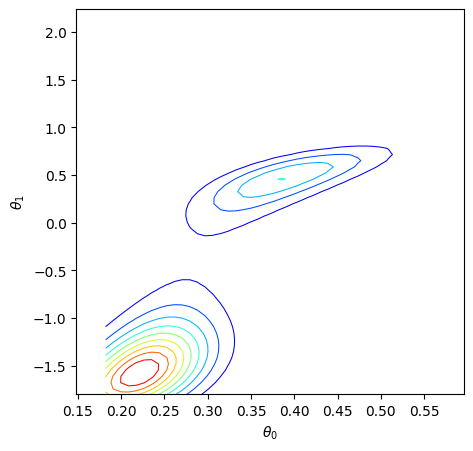

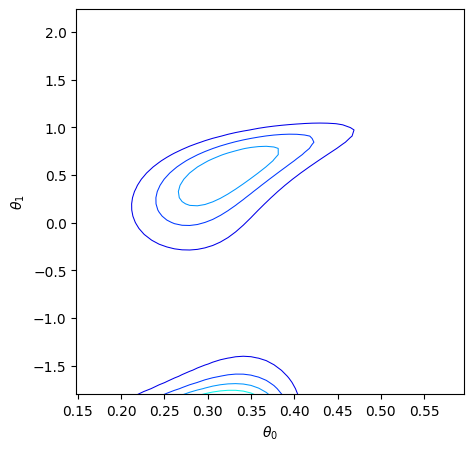

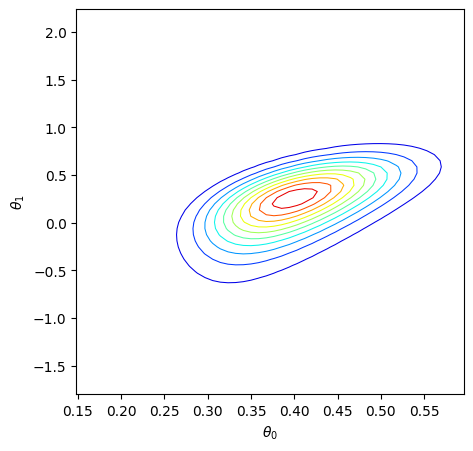

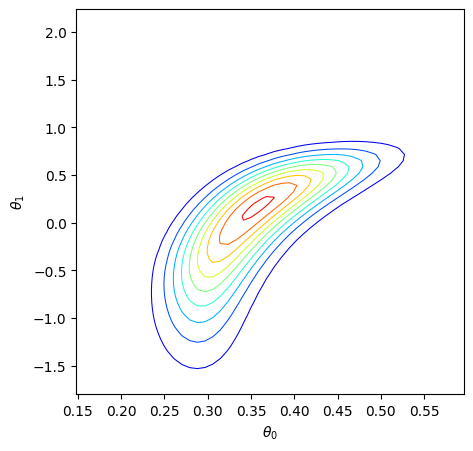

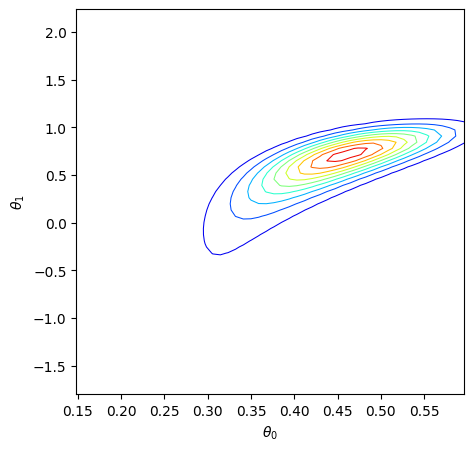

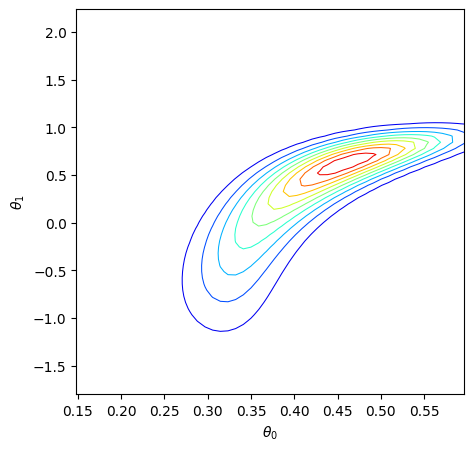

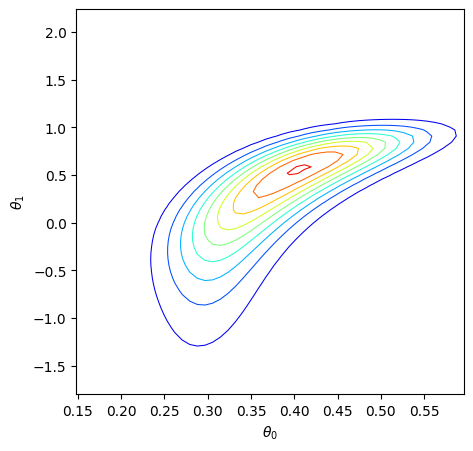

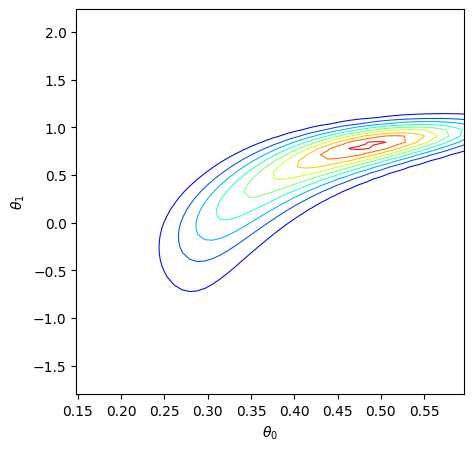

In [5]:
## Sequential Neural Likelihood
hyperparams = ABC_algorithms.Hyperparams()
hyperparams.save_dir = DIR
hyperparams.device = 'cuda'
hyperparams.num_sim = 4000
hyperparams.L = 10

print('\n SNL ABC')
snl_abc = SNLABC.SNL_ABC(problem, discrepancy=discrepancy.eculidean_dist, hyperparams=hyperparams)
snl_abc.run()

JSD_array = []
for l in range(len(snl_abc.nde_array)):
    print('l=', l)
    snl_abc.nde_net = snl_abc.nde_array[l]
    visualization.plot_likelihood(samples=true_samples, log_likelihood_function=snl_abc.log_likelihood, dimensions=(0,1))
    JSD = discrepancy.JSD(problem.log_likelihood, snl_abc.log_likelihood, true_samples, true_samples, N_grid=30)
    JSD_array.append(JSD)
    print('JSD snl = ', JSD)
utils_os.save_object(DIR, 'JSD_SNL', JSD_array)

iteration  0
# of cpus =  4

 > fitting encoder
summary statistic dim = 4 original dim = 50
architecture [50, 100, 100, 4]
finished: t= 0 loss= 1.5714375972747803 loss val= 1.5699505805969238 best loss 1.5699505805969238
finished: t= 200 loss= 0.8242338299751282 loss val= 0.8477829098701477 best loss 0.8339447975158691
finished: t= 400 loss= 0.5616269111633301 loss val= 0.5758683085441589 best loss 0.5588210225105286
finished: t= 600 loss= 0.48208630084991455 loss val= 0.5511757135391235 best loss 0.47271427512168884
finished: t= 800 loss= 0.413213849067688 loss val= 0.4740145802497864 best loss 0.437492311000824
finished: t= 1000 loss= 0.39262980222702026 loss val= 0.44318926334381104 best loss 0.4246438443660736
finished: t= 1200 loss= 0.35651326179504395 loss val= 0.42854422330856323 best loss 0.40968453884124756
finished: t= 1400 loss= 0.3354927897453308 loss val= 0.475119948387146 best loss 0.40968453884124756
finished: t= 1600 loss= 0.3153206408023834 loss val= 0.47270667552948 b

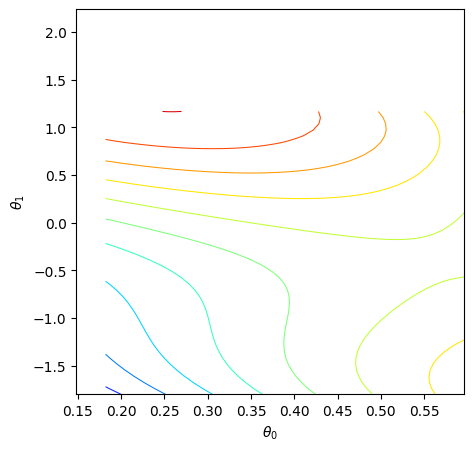

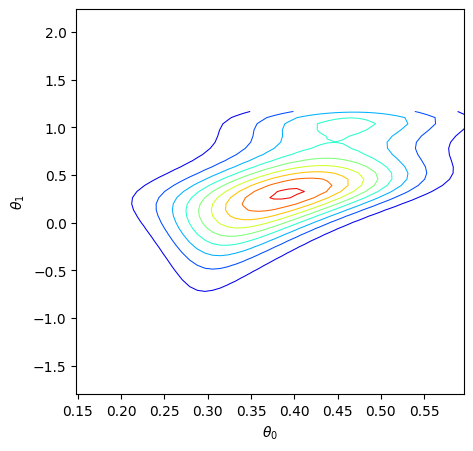

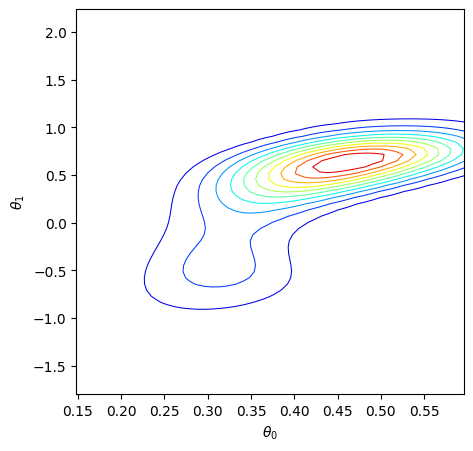

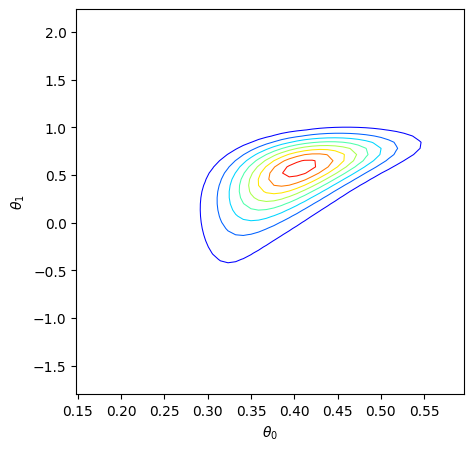

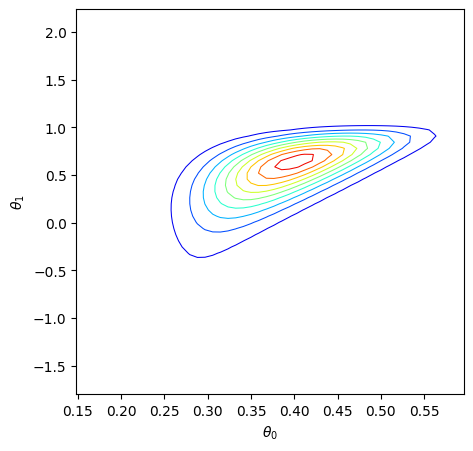

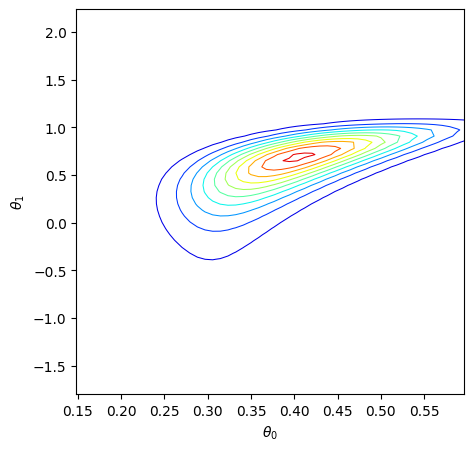

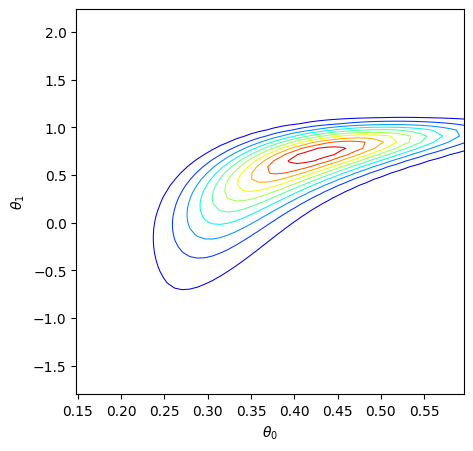

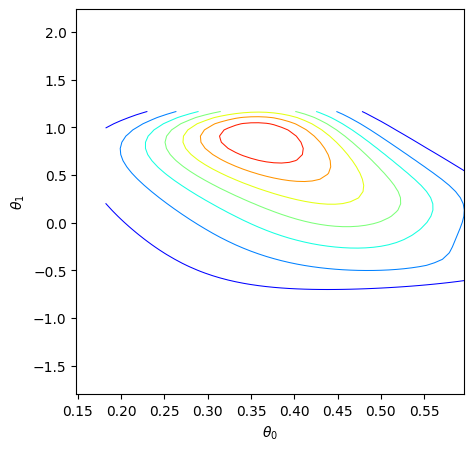

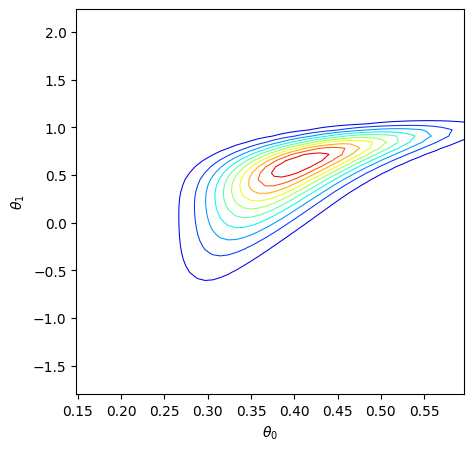

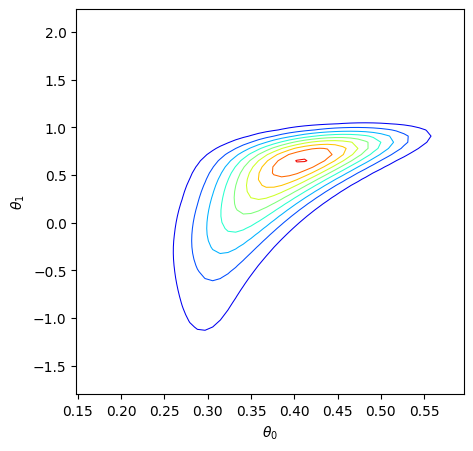

In [6]:
### Sequential Neural Likelihood + 
hyperparams = ABC_algorithms.Hyperparams()
hyperparams.save_dir = DIR
hyperparams.device = 'cuda'
hyperparams.num_sim = 4000                       # number of simulations
hyperparams.L = 10                               # number of learning rounds
hyperparams.type = 'cnn1d'                       # the network architecture of S(x)
hyperparams.stat = 'infomax'    
                 # statistics function: infomax/moment/score   
hyperparams.nde = 'MAF'                          # nde; MAF (D>1) or MDN (D=1)
hyperparams.estimator = 'JSD'                     # MI estimator; JSD (accurate) or DC (fast)

snl2_abc = SNL2ABC.SNL2_ABC(problem, discrepancy=discrepancy.eculidean_dist, hyperparams=hyperparams)
snl2_abc.run()

JSD_array = []
for l in range(len(snl2_abc.nde_array)):
    print('l=', l)
    snl2_abc.set(l=l)
    visualization.plot_likelihood(samples=true_samples, log_likelihood_function=snl2_abc.log_likelihood, dimensions=(0,1))
    JSD = discrepancy.JSD(problem.log_likelihood, snl2_abc.log_likelihood, true_samples, true_samples, N_grid=30)
    JSD_array.append(JSD)
    print('JSD snl+ = ', JSD)
utils_os.save_object(DIR, 'JSD_SNL2', JSD_array)